In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen , Request
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import requests
import pandas as pd

# links are being loaded dynamically in page. You neeed to inspect the Network tab in Dev tools,
# and you will notice an XHR call is being made to an API, which returns a JSON response. 
# The following code will get you the information loaded by javascript in page:

def create_url_and_header(symbol):
    headers = {
        'authority': 'news-headlines.tradingview.com',
        'method': 'GET',
        'path': f'/headlines/?category=stock&lang=en&symbol=NSE%3A{symbol}',
        'scheme': 'https',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'origin': 'https://www.tradingview.com',
        'referer': 'https://www.tradingview.com/',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'same-site',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36'
    }
    url=f'https://news-headlines.tradingview.com/headlines/?category=stock&lang=en&symbol=NSE%3A{symbol}'
    
    return headers, url

In [3]:
tickers = ['TORNTPHARM', 'YESBANK', 'TIINDIA']

date_to_check_till = datetime(2022, 1, 1)

data=[]
for ticker in tickers:
    headers, url = create_url_and_header(ticker)
    r = requests.get(url, headers=headers)
    num_headlines = len(r.json())
    for i in range(num_headlines):
        headline = r.json()[i]['title']
        date = datetime.fromtimestamp(r.json()[i]['published'])
        if date >= date_to_check_till:
            data.append([ticker , date, headline])
        
columns = ["ticker", "date", "news"]
news_df = pd.DataFrame(data, columns=columns)
display(news_df)


,ticker,date,news
0,TORNTPHARM,2022-05-27 04:08:48,Torrent Pharmaceuticals to Acquire Four Brands...
1,TORNTPHARM,2022-05-26 10:22:12,Torrent Pharmaceuticals Turns to Loss in Fisca...
2,TORNTPHARM,2022-05-26 01:46:16,Torrent Pharmaceuticals Plans to Raise Up to $...
3,TORNTPHARM,2022-05-23 07:18:47,Torrent Pharmaceuticals Board to Consider Issu...
4,TORNTPHARM,2022-03-18 04:00:16,Torrent Pharmaceuticals Signs License Pact for...
5,TORNTPHARM,2022-03-09 10:59:04,Indian companies stay put in Russia but pharma...
6,TORNTPHARM,2022-01-26 05:50:48,Torrent Pharma's Profit Drops 16% in Fiscal Q3...
7,TORNTPHARM,2022-01-10 07:11:33,Torrent Pharmaceuticals Board to Consider Inte...
8,YESBANK,2022-07-25 05:07:33,"Yes Bank's Fiscal Q1 Consolidated Net Profit, ..."
9,YESBANK,2022-07-19 09:15:27,Market Chatter: Yes Bank Plans $1 Billion Fund...


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

scores = news_df['news'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)

display(scores_df)

news_df = news_df.join(scores_df, rsuffix='_right')
news_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\John.Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,neg,neu,pos,compound
0,0.00,1.000,0.000,0.0000
1,0.17,0.667,0.163,-0.0258
2,0.00,1.000,0.000,0.0000
3,0.00,0.551,0.449,0.6908
4,0.00,1.000,0.000,0.0000
5,0.00,1.000,0.000,0.0000
6,0.11,0.690,0.200,0.3182
7,0.00,1.000,0.000,0.0000
8,0.00,0.556,0.444,0.6808
9,0.00,0.787,0.213,0.4019


,ticker,date,news,neg,neu,pos,compound
0,TORNTPHARM,2022-05-27 04:08:48,Torrent Pharmaceuticals to Acquire Four Brands...,0.00,1.000,0.000,0.0000
1,TORNTPHARM,2022-05-26 10:22:12,Torrent Pharmaceuticals Turns to Loss in Fisca...,0.17,0.667,0.163,-0.0258
2,TORNTPHARM,2022-05-26 01:46:16,Torrent Pharmaceuticals Plans to Raise Up to $...,0.00,1.000,0.000,0.0000
3,TORNTPHARM,2022-05-23 07:18:47,Torrent Pharmaceuticals Board to Consider Issu...,0.00,0.551,0.449,0.6908
4,TORNTPHARM,2022-03-18 04:00:16,Torrent Pharmaceuticals Signs License Pact for...,0.00,1.000,0.000,0.0000


                                 neg    neu    pos  compound
ticker     date                                             
TIINDIA    2022-01-24 23:54:27  0.00  1.000  0.000    0.0000
           2022-02-08 09:31:58  0.00  0.679  0.321    0.6369
           2022-02-14 09:07:54  0.00  0.671  0.329    0.5994
           2022-03-03 02:49:57  0.00  1.000  0.000    0.0000
           2022-05-05 03:53:40  0.00  0.787  0.213    0.4019
           2022-07-19 02:52:53  0.00  1.000  0.000    0.0000
           2022-07-22 03:05:47  0.00  1.000  0.000    0.0000
TORNTPHARM 2022-01-10 07:11:33  0.00  1.000  0.000    0.0000
           2022-01-26 05:50:48  0.11  0.690  0.200    0.3182
           2022-03-09 10:59:04  0.00  1.000  0.000    0.0000
           2022-03-18 04:00:16  0.00  1.000  0.000    0.0000
           2022-05-23 07:18:47  0.00  0.551  0.449    0.6908
           2022-05-26 01:46:16  0.00  1.000  0.000    0.0000
           2022-05-26 10:22:12  0.17  0.667  0.163   -0.0258
           2022-05-27 04

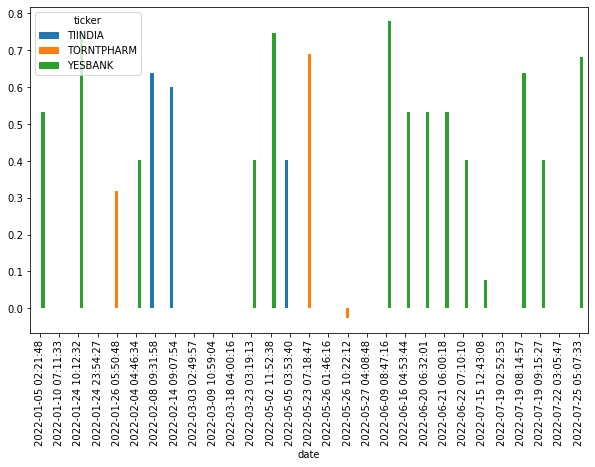

In [5]:

mean_scores = news_df.groupby(['ticker', 'date']).mean()
print(mean_scores)
mean_scores = mean_scores.unstack()
print(mean_scores)
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
plt.rcParams['figure.figsize'] = [10, 6]
mean_scores.plot(kind='bar')
plt.show()